In [12]:
import pandas as pd
import numpy as np
import df_utils
import pickle

import utils
import logistic

In [13]:
# Config
optimize : bool = False
train : bool = False
train_test_split: float = 0.85

In [3]:
diff = pd.read_csv('./data/diff.csv')

# Data sets

In [4]:
np.random.seed(0)
train_mask : np.ndarray = np.random.rand(len(diff)) < train_test_split

In [5]:
# clean and normalized
train_1, test_1 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=1,
                                      cuad_features=False,
                                      rate_features=False)

# add rate features (hours between extraction)
train_2, test_2 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=1,
                                      cuad_features=False,
                                      rate_features=True)

# add cuadratic features
train_3, test_3 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=1,
                                      cuad_features=True,
                                      rate_features=False)

# Compare features


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0, max_iter=1000, n_jobs=2, C=1)

base average precision : 0.8996321158148843
base + rate feature average precision : 0.8979362399491057
t_stat: 0.24320141629000572 
p_value: 0.8088857195630298
Can't reject null hypothesis, both datasets behave equally


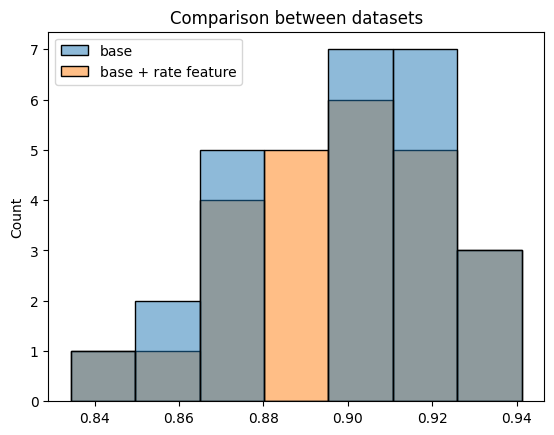

In [8]:
scores_1, scores_2 = utils.compare_features(train_a = train_1,
                                            train_b = train_2,
                                            feat_name_a = "base",
                                            feat_name_b = "base + rate feature",
                                            model = lr_classifier,
                                            metric = "precision",
                                            n_folds = 25,
                                            n_samples = 10000 
                                            )

base average precision : 0.8956309787726734
base + cuadratic features average precision : 0.9526954260000008
t_stat: -11.429517073978719 
p_value: 2.6701346257805927e-15
p value is smaller than 0.05


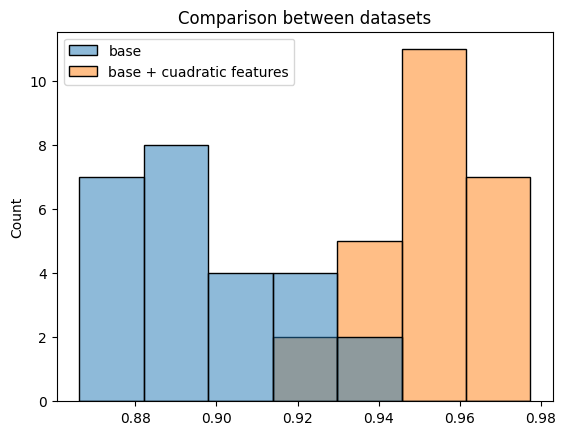

In [9]:
scores_1, scores_3 = utils.compare_features(train_a = train_1,
                                            train_b = train_3,
                                            feat_name_a = "base",
                                            feat_name_b = "base + cuadratic features",
                                            model = lr_classifier,
                                            metric = "precision",
                                            n_folds = 25,
                                            n_samples = 10000)

# Model

In [19]:
if train:
    lr_classifier = logistic.train_lr(train_data=train_3, c_param=3.33, optimize=optimize, save_model=True)
else:
    with open('./models/lr_classifier.pkl', 'rb') as fid:
        lr_classifier = pickle.load(fid)

<Figure size 300x200 with 0 Axes>

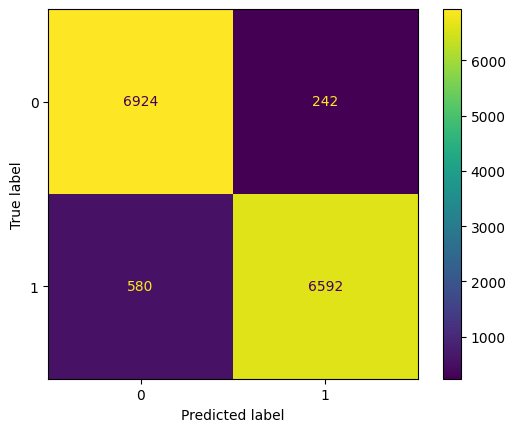

{'accuracy': 0.9426698284279537, 'f1': 0.9413108667713836, 'recall': 0.9191299498047965, 'precision': 0.964588820602868}


In [27]:
lr_predictions, lr_probabilities, metrics = utils.get_predictions(test_data=test_3, model=lr_classifier)
print(metrics)

with open('./predictions/lr_predictions.pkl', 'wb') as fid:
    pickle.dump(lr_predictions, fid)

with open('./predictions/lr_probabilities.pkl', 'wb') as fid:
    pickle.dump(lr_predictions, fid)